# find all of Katie's data

In [1]:
import os
indir='/home/krothamel/projects/Kris_Katie'
# single reps 
overlap_beds = [f for f in os.listdir(indir) 
         if f.startswith('overlap')]

In [2]:
overlap_beds

['overlap_PCF11_df.bed',
 'overlap_ERH_df.bed',
 'overlap_NUP35_df.bed',
 'overlap_DLD_df.bed',
 'overlap_DARS_df.bed',
 'overlap_DLST_df.bed',
 'overlap_RPS5_df.bed',
 'overlap_KARS_df.bed',
 'overlap_MARS_df.bed']

In [3]:
all_katis_beds = [os.path.join(indir,f) for f in overlap_beds]

In [4]:
# this is an internal package I wrote for easy access to encode data 
from pybedtools import BedTool
import matplotlib.pyplot as plt
plt.style.use('seaborn-muted')
import sys
import pandas as pd
import numpy as np
master_df = pd.read_csv('encode_data.csv')
master_df['idr'] # these are all the IDR peaks!

0      /projects/ps-yeolab5/encode/EVN_eCLIP_analysis...
1      /projects/ps-yeolab5/encode/EVN_eCLIP_analysis...
2      /projects/ps-yeolab5/encode/EVN_eCLIP_analysis...
3      /projects/ps-yeolab5/encode/EVN_eCLIP_analysis...
4      /projects/ps-yeolab5/encode/EVN_eCLIP_analysis...
                             ...                        
330    /projects/ps-yeolab5/encore/processing/encore_...
331    /projects/ps-yeolab5/encore/processing/encore_...
332    /projects/ps-yeolab5/encore/processing/encore_...
333    /projects/ps-yeolab5/encore/processing/encore_...
334    /projects/ps-yeolab5/encore/processing/encore_...
Name: idr, Length: 335, dtype: object

## Calculate Jaccard for rG4

In [5]:

def get_jaccard(bed1,bed2):
    '''
    input 2 bed files, return jaccard index to represent how they overlap
    
    '''
    # select IDRs and G4 in UTR only
    
    
    
    intersect = len(bed1.intersect(bed2, s = True, u = True))
    not_one = len(bed2)-intersect
    not_two = len(bed1)-intersect
    
    jaccard = intersect/(intersect+not_one+not_two)
    return jaccard

In [6]:
# let's try out 1 bed files
katie_dars = BedTool('/home/wjin/projects/CLIP_seq/Kris_Katie/Data/full_IDR_pipeline_2inputs_example11/results/DARS_A.vs.DARS_B.bed')
encode_gars = BedTool(master_df.loc[master_df['RBP']=='GARS', 'idr'].iloc[0])

In [7]:
get_jaccard(katie_dars,encode_gars)

0.09447852760736196

In [8]:
# get the rbp name from katie's rbp
rbps = [os.path.basename(f).split('_')[1] for f in all_katis_beds]

In [9]:
rbps

['PCF11', 'ERH', 'NUP35', 'DLD', 'DARS', 'DLST', 'RPS5', 'KARS', 'MARS']

In [10]:
all_rbp_data = master_df['idr']

In [11]:
all_dist = []
# # let's loop over all katie's RBP
for katie_dir, query_rbp_name in zip(all_katis_beds, rbps):
    jaccard_to_katie = {}
    
    katie_rbp = BedTool(katie_dir)
    
    # calculate encode
    for index, row in master_df.iterrows():
        try:
            encode_rbp = row['uid']+'_'+ row['RBP'] # make a unique id for each RBP
            encode_bed = BedTool(row['idr'])

            jaccard_to_katie[encode_rbp] = get_jaccard(katie_rbp, encode_bed)
        except Exception as e:
            print(e) # some of the encode data are not complete yet therefore it might elicit some error
    # calculate those from katie, also compare internally
    for rbp, path in zip(rbps, all_katis_beds):
        jaccard_to_katie[f'katie_{rbp}'] = get_jaccard(katie_rbp, BedTool(path))
    
    # save
    all_dist.append(pd.Series(jaccard_to_katie, name = query_rbp_name))

File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch11a_IDR/results/4038_CLIP1_rep1.vs.4038_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch11a_IDR/results/4053_CLIP1_rep1.vs.4053_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch14_IDR/results/4099_CLIP1_rep1.vs.4099_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch16_IDR/results/4093_CLIP1_rep1.vs.4093_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master__IDR/results/4094_CLIP1_rep1.vs.4094_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch17_IDR/results/4096_CLIP1_rep1.vs.4096_CLIP2_rep2.bed" does not exist
File "/projects

File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch14_IDR/results/4099_CLIP1_rep1.vs.4099_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch16_IDR/results/4093_CLIP1_rep1.vs.4093_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master__IDR/results/4094_CLIP1_rep1.vs.4094_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch17_IDR/results/4096_CLIP1_rep1.vs.4096_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master__IDR/results/4092_CLIP1_rep1.vs.4092_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeolab5/encore/processing/encore_master_IDR_hg38/results/encore_master_batch11a_IDR/results/4038_CLIP1_rep1.vs.4038_CLIP2_rep2.bed" does not exist
File "/projects/ps-yeol

In [12]:
# conver to dataframe 
df = pd.DataFrame(all_dist)

In [13]:
df.head()

,203_HNRNPC,204_RBFOX2,205_IGF2BP1,206_HNRNPK,209_SRSF7,211_IGF2BP3,215_TIA1,216_SRSF9,218_TRA2A,220_IGF2BP1,...,4221_TIAL1,katie_PCF11,katie_ERH,katie_NUP35,katie_DLD,katie_DARS,katie_DLST,katie_RPS5,katie_KARS,katie_MARS
PCF11,0.000418,0.009025,0.002451,0.004307,0.001740,0.000450,0.000937,0.000170,0.000000,0.001790,...,0.002258,1.000000,0.00018,0.010754,0.000346,0.001467,0.005095,0.007315,0.009379,0.004797
ERH,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001142,0.000000,0.000000,0.000000,...,0.000186,0.000180,1.00000,0.000000,0.000000,0.000000,0.001856,0.000146,0.001020,0.008032
NUP35,0.000698,0.027322,0.006407,0.000765,0.000767,0.001921,0.002434,0.001029,0.000202,0.005534,...,0.007059,0.012925,0.00000,1.000000,0.004949,0.006625,0.012232,0.011808,0.013420,0.009131
DLD,0.000000,0.000000,0.000000,0.000161,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.002059,0.000518,0.00000,0.005651,1.000000,0.036087,0.101171,0.007158,0.031739,0.034188
DARS,0.000000,0.000107,0.001105,0.000264,0.000863,0.000484,0.000000,0.002746,0.020735,0.002112,...,0.000831,0.001467,0.00000,0.005280,0.024946,1.000000,0.017975,0.004385,0.028226,0.022749


In [14]:
df.shape

(9, 337)

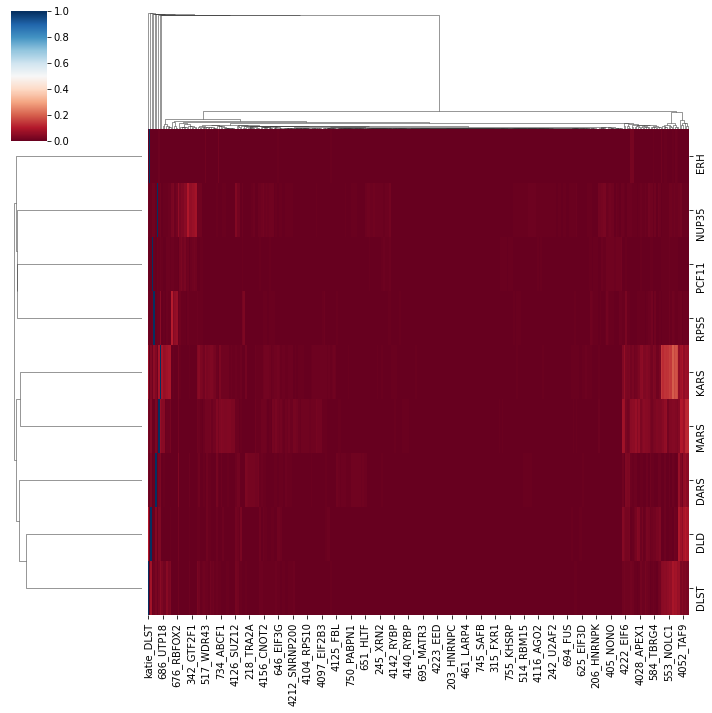

In [15]:
import seaborn as sns
# we can add annotation to functions and compelxes on the side if you want :)
sns.clustermap(df, cmap = 'RdBu')

In [16]:
df.to_csv('jaccard.csv')